In [7]:
from simtk import openmm, unit
from simtk.openmm import app
import mdtraj as md
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm

In [8]:
fname = '3000K'

In [9]:
traj = md.load(f'{fname}.dcd', top='ala2_fromURL.pdb')


atom_indices = np.array(range(22))
frame = md.load_pdb('outputexplicit.pdb',atom_indices=atom_indices,frame=0)
print(frame)

In [10]:
def compute_phi_psi(trajectory):
    phi_atoms = [4, 6, 8, 14]
    phi = md.compute_dihedrals(trajectory, indices=[phi_atoms])[:, 0]
    psi_atoms = [6, 8, 14, 16]
    psi = md.compute_dihedrals(trajectory, indices=[psi_atoms])[:, 0]
    return phi, psi

In [11]:
import pickle
pickleFile = open(f'parameters/parameters{fname}.pkl','rb')
parametersdict = pickle.load(pickleFile)
temp = parametersdict['Temperature']
coll_rate = parametersdict['Collision rate']
timestep = parametersdict['Timestep']
reportInterval = parametersdict['Report Interval']

In [12]:
def plot_phi_psi(ax, trajectory):
    # with open('parameterfile.txt') as f:
    #     parameters = f.read()
    
    parameters = f'{temp}\nCollision rate:{coll_rate}\nTimestep: {timestep}\nReport every {reportInterval} steps'
    time = trajectory.n_frames*reportInterval*timestep
    time.value_in_unit(unit.seconds)

    phi, psi = compute_phi_psi(trajectory)
    
    ax.hist2d(phi, psi, 50, norm=LogNorm())
    ax.set_xlim(-np.pi, np.pi)
    ax.set_ylim(-np.pi, np.pi)
    ax.set_xlabel(f"$\phi$ \n {parameters}\nTime: {time.value_in_unit(unit.seconds):.3E} s")
    _ = ax.set_ylabel("$\psi$")

In [13]:
# import pickle
# pickleFile = open('parameters.pkl','rb')
# parametersdict = pickle.load(pickleFile)
    
# time = traj.n_frames*parametersdict['Report Interval']*parametersdict['Timestep']
# print(time.value_in_unit(unit.seconds))
# print(time)

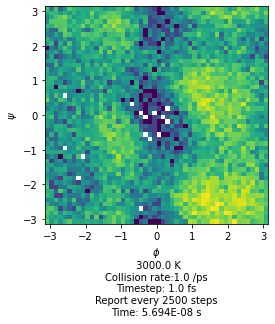

In [14]:
fig, ax = plt.subplots(figsize=(4,4))

plot_phi_psi(ax, traj)
#plt.text()
plt.savefig(f'vary_temp/{fname}.png', bbox_inches="tight")
#plt.close()